# Examen 3

In [1]:
# Importaciones
from sympy import *
import numpy as np
import pandas as pd
import requests as rq
import json
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Punto 1
Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 


### Sol punto 1
Segun el enunciado anterior, entiendo que el sistema planteado es el siguiente, con fricción, la cual no se indica cual es su coeficiente (dinamico o estatico)

![](EsquemaPunto1.png) (Imagen tomada de internet)

Aplicando Newton tenemos como resultado:

$$
m\dfrac{d^2x}{dt^2} + b\dfrac{dx}{dt} + kx = 0
$$

donde 
$$
\dfrac{dx}{dt}
$$
se puede ver que es $v$


Dado que el sistema depende de b (el cual no está definido), y evoluciona a lo largo de t, tomaremos b tales que: $-1<= b =< 1$

In [2]:
# valores iniciales
m = 0.2
k = 1
b = np.linspace(-1,1,21)
b

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [3]:
# defino las varibles
t  = symbols("t")
x = Function("x")

In [4]:
# defino la ecuación
lista_ed = []
for i in range(0,len(b)):
    if b[i] == 0:
        pass
    else:
        lista_ed.append(Eq( m*x(t).diff(t,2) + b[i]*x(t).diff() + k*x(t), 0))
lista_ed

[Eq(x(t) - 1.0*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.9*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.8*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.7*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.6*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.5*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.4*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.3*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.2*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) - 0.1*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) + 0.1*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) + 0.2*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) + 0.3*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(t) + 0.4*Derivative(x(t), t) + 0.2*Derivative(x(t), (t, 2)), 0),
 Eq(x(

Estos son los posibles valores (para la variable x) que podemos encontrar variando el parametro b (coeficiente de fricción)

In [5]:
posibles_x = []
for i in range(0,len(lista_ed)):
    posibles_x.append(dsolve(lista_ed[i],x(t)))
posibles_x

[Eq(x(t), C1*exp(1.38196601125011*t) + C2*exp(3.61803398874989*t)),
 Eq(x(t), C1*exp(2.0*t) + C2*exp(2.5*t)),
 Eq(x(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(2.0*t)),
 Eq(x(t), (C1*sin(1.39194109070751*t) + C2*cos(1.39194109070751*t))*exp(1.75*t)),
 Eq(x(t), (C1*sin(1.6583123951777*t) + C2*cos(1.6583123951777*t))*exp(1.5*t)),
 Eq(x(t), (C1*sin(1.85404962177392*t) + C2*cos(1.85404962177392*t))*exp(1.25*t)),
 Eq(x(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(1.0*t)),
 Eq(x(t), (C1*sin(2.10653744329409*t) + C2*cos(2.10653744329409*t))*exp(0.75*t)),
 Eq(x(t), (C1*sin(2.17944947177034*t) + C2*cos(2.17944947177034*t))*exp(0.5*t)),
 Eq(x(t), (C1*sin(2.2220486043289*t) + C2*cos(2.2220486043289*t))*exp(0.25*t)),
 Eq(x(t), (C1*sin(2.2220486043289*t) + C2*cos(2.2220486043289*t))*exp(-0.25*t)),
 Eq(x(t), (C1*sin(2.17944947177034*t) + C2*cos(2.17944947177034*t))*exp(-0.5*t)),
 Eq(x(t), (C1*sin(2.10653744329409*t) + C2*cos(2.10653744329409*t))*exp(-0.75*t)),
 Eq(x(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(-1

Estos son los posibles valores (para la variable v) que podemos encontrar variando el parametro b (coeficiente de fricción)

In [6]:
posibles_v = []
for i in range(0,len(posibles_x)):
    posibles_v.append(diff(posibles_x[i],t))
posibles_v

[Derivative(Eq(x(t), C1*exp(1.38196601125011*t) + C2*exp(3.61803398874989*t)), t),
 Derivative(Eq(x(t), C1*exp(2.0*t) + C2*exp(2.5*t)), t),
 Derivative(Eq(x(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(2.0*t)), t),
 Derivative(Eq(x(t), (C1*sin(1.39194109070751*t) + C2*cos(1.39194109070751*t))*exp(1.75*t)), t),
 Derivative(Eq(x(t), (C1*sin(1.6583123951777*t) + C2*cos(1.6583123951777*t))*exp(1.5*t)), t),
 Derivative(Eq(x(t), (C1*sin(1.85404962177392*t) + C2*cos(1.85404962177392*t))*exp(1.25*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(1.0*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.10653744329409*t) + C2*cos(2.10653744329409*t))*exp(0.75*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.17944947177034*t) + C2*cos(2.17944947177034*t))*exp(0.5*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.2220486043289*t) + C2*cos(2.2220486043289*t))*exp(0.25*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.2220486043289*t) + C2*cos(2.2220486043289*t))*exp(-0.25*t)), t),
 Derivative(Eq(x(t), (C1*sin(2.17944947177034*t)

In [7]:
df_resultado = pd.DataFrame({"x":posibles_x,"v":posibles_v})
df_resultado

,x,v
0,"Eq(x(t), C1*exp(1.38196601125011*t) + C2*exp(3...","Derivative(Eq(x(t), C1*exp(1.38196601125011*t)..."
1,"Eq(x(t), C1*exp(2.0*t) + C2*exp(2.5*t))","Derivative(Eq(x(t), C1*exp(2.0*t) + C2*exp(2.5..."
2,"Eq(x(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(2...","Derivative(Eq(x(t), (C1*sin(1.0*t) + C2*cos(1...."
3,"Eq(x(t), (C1*sin(1.39194109070751*t) + C2*cos(...","Derivative(Eq(x(t), (C1*sin(1.39194109070751*t..."
4,"Eq(x(t), (C1*sin(1.6583123951777*t) + C2*cos(1...","Derivative(Eq(x(t), (C1*sin(1.6583123951777*t)..."
5,"Eq(x(t), (C1*sin(1.85404962177392*t) + C2*cos(...","Derivative(Eq(x(t), (C1*sin(1.85404962177392*t..."
6,"Eq(x(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(1...","Derivative(Eq(x(t), (C1*sin(2.0*t) + C2*cos(2...."
7,"Eq(x(t), (C1*sin(2.10653744329409*t) + C2*cos(...","Derivative(Eq(x(t), (C1*sin(2.10653744329409*t..."
8,"Eq(x(t), (C1*sin(2.17944947177034*t) + C2*cos(...","Derivative(Eq(x(t), (C1*sin(2.17944947177034*t..."
9,"Eq(x(t), (C1*sin(2.2220486043289*t) + C2*cos(2...","Derivative(Eq(x(t), (C1*sin(2.2220486043289*t)..."


obteniendo como resultado, que los valores iniciales dependen siempre de C1 y C2, siendo estos amplitudes, estas dependen de 2 factores,

1) la posición inicial del sistema:
        - Punto de equilibrio
        - Derecha del punto de equilibrio
        - Izquierda del punto de equilibrio
2) la velocidad inicial del sistema:
        - nula
        - Hacia la derecha, paralela a la superficie
        - Hacia la izquierda, paralela a la superficie


## Punto 2
Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

### Sol punto 2 a

saco lo datos

In [8]:
url = "https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json"
respuesta_pag = rq.get(url)
datos_extraidos = pd.DataFrame(json.loads(respuesta_pag.text))
datos_extraidos

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


miro el comportamiento de los mismos

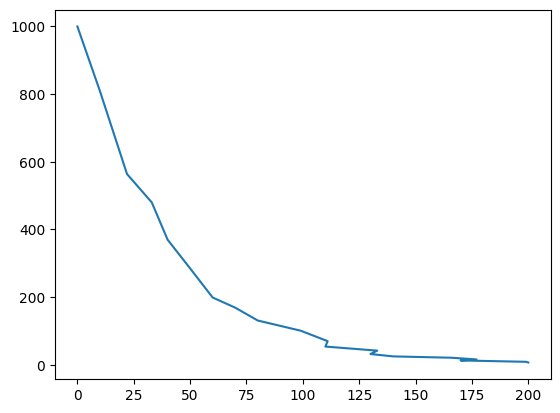

In [9]:
plt.figure()
plt.plot(datos_extraidos["t"],datos_extraidos["N(t)"])
plt.show()

Dado el decaimiento de la función, se puede sospechar que es de la forma

$$
f(t) = a \operatorname{e}^{-bt}
$$

In [32]:
# defino la función que se sospecha
def sospecha(t, a, b):
    return a*np.exp(-b*t)

calculo el valor de b

In [35]:
aprox, err = curve_fit(sospecha,datos_extraidos["t"],datos_extraidos["N(t)"])
aprox, err

C:\Users\oscar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1.01295013e+03, 2.50743577e-02]),
 array([[1.34310232e+02, 3.25783542e-03],
        [3.25783542e-03, 2.09515051e-07]]))

calculo el tiempo de vida medio y su respectivo error

$$
\tau = \frac{Ln(2)}{b}
$$

multiplico por 3 la desviación estandar de cada valor aproximado para tener dentro el 99,7% de los datos, aunque aumente la incertidumbre, a su vez aumenta la certeza

In [41]:
tau = np.log(2)/aprox[1]
err_tau = np.log(2)*err[0]*3
coeficiente = aprox[0]
err_coeficiente = err[0][0]*3

print("Valores de vida media: ")
print("Valor: ",tau," || Error:",err_tau)
print("Valores de coeficiente:")
print("Valor: ",coeficiente," || Error:",err_coeficiente)

Valores de vida media: 
Valor:  27.643666492360662  || Error: [2.79290276e+02 6.77447830e-03]
Valores de coeficiente:
Valor:  1012.950125090252  || Error: 402.9306958675733


### Sol punto 2 b

genero los datos ajustados para comparar con los medidos

In [42]:
valores_t = np.linspace(0,200,2000)
valores_x = coeficiente*np.exp(-np.log(2)*valores_t/tau)

grafico los datos

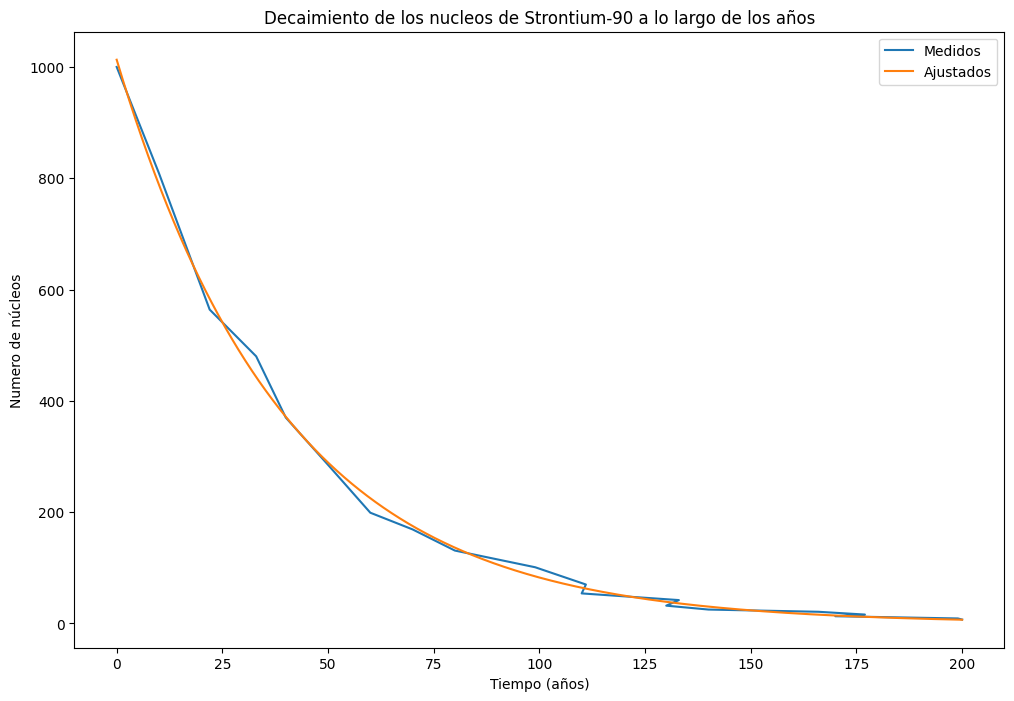

In [50]:
plt.figure(figsize=(12,8))
plt.title("Decaimiento de los nucleos de Strontium-90 a lo largo de los años")
plt.ylabel("Numero de núcleos")
plt.xlabel("Tiempo (años)")
plt.plot(datos_extraidos["t"],datos_extraidos["N(t)"])
plt.plot(valores_t,valores_x)
plt.legend(["Medidos","Ajustados"])
plt.show()